In [1]:
%reset
# from __future__ import division

import numpy as np
from sklearn import preprocessing
import math
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import pandas as pd
from numpy import *

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:

file_name = '../Emilio Caba/Final_data_cleaned_missing_houses.csv'
#file_name = '../Emilio Caba/Combined_data.csv'
df = pd.read_csv(file_name)

df = df.rename(columns={'ID-nummer' : 'Index'})
df = df.set_index('Index')
df.index = pd.to_datetime(df.index)

#this cell is used to combine the 2 parts of the full dataframe (production and consumption)
production = df.iloc[0:,0:28]
consumption = df.iloc[0:,28:57]

col_names = ['H0' + str(col) if col < 10 else 'H' + str(col) for col in range(1,29)]

#production.columns = col_names
#consumption.columns = col_names



In [3]:
df_prod = production.sum(axis=1)
df_cons = consumption.sum(axis=1)

df_prod = df_prod.apply(lambda kwh: (kwh / (1/4) * 1000)/230 )
df_cons = df_cons.apply(lambda kwh: (kwh / (1/4) * 1000)/230 )

In [4]:
df_cons

Index
2017-09-12 00:15:00    39.791304
2017-09-12 00:30:00    41.895652
2017-09-12 00:45:00    29.947826
2017-09-12 01:00:00    36.139130
2017-09-12 01:15:00    50.208696
                         ...    
2019-05-31 23:00:00    49.634783
2019-05-31 23:15:00    55.565217
2019-05-31 23:30:00    58.939130
2019-05-31 23:45:00    42.226087
2019-06-01 00:00:00    50.313043
Length: 54745, dtype: float64

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


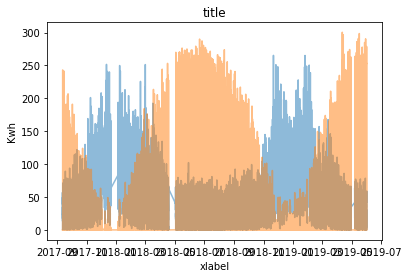

In [5]:
x = df_prod.index

plt.plot(x, df_cons, alpha=0.5)
plt.plot(x, df_prod, alpha=0.5)
plt.title('title')
plt.ylabel('Kwh')
plt.xlabel('xlabel')
plt.show()

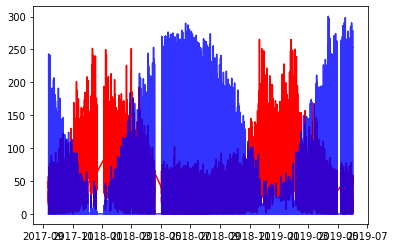

In [6]:
plt.plot(x, df_cons, 'r') # plotting t, a separately 
plt.plot(x, df_prod, 'b', alpha=0.8) # plotting t, b separately


plt.show()




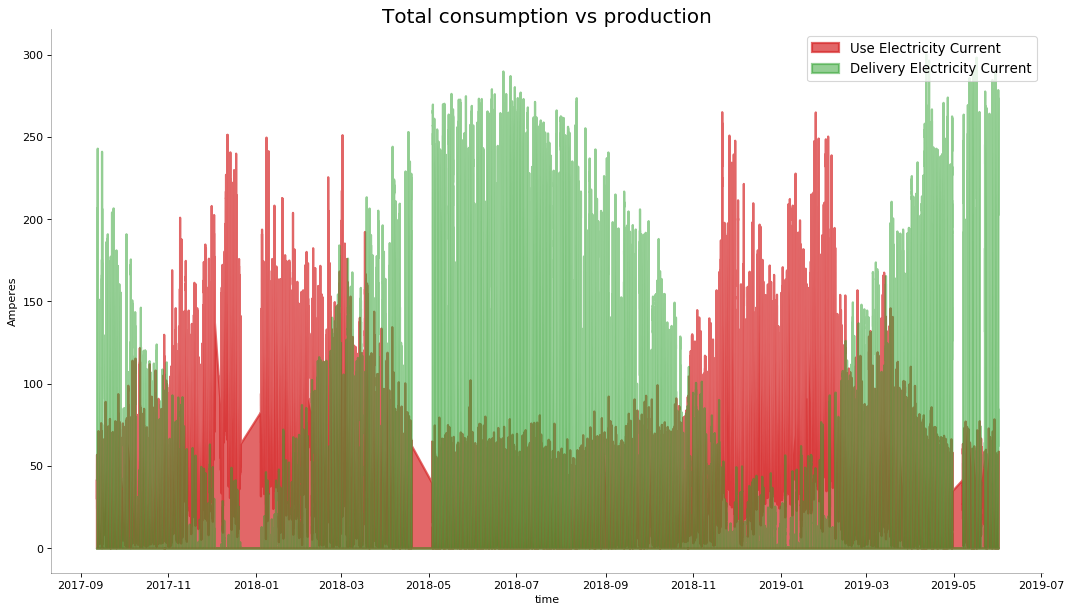

In [7]:

# Prepare Data
#x = df_prod.index
x = df.index
y1 = df_cons
y2 = df_prod
mycolors = ['tab:green', 'tab:red']      
columns = ['Delivery Electricity Current', 'Use Electricity Current']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.7, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)



# Decorations
ax.set_title('Total consumption vs production', fontsize=18)

ax.legend(loc='best', fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


plt.ylabel('Amperes')
plt.xlabel('time')
plt.show()

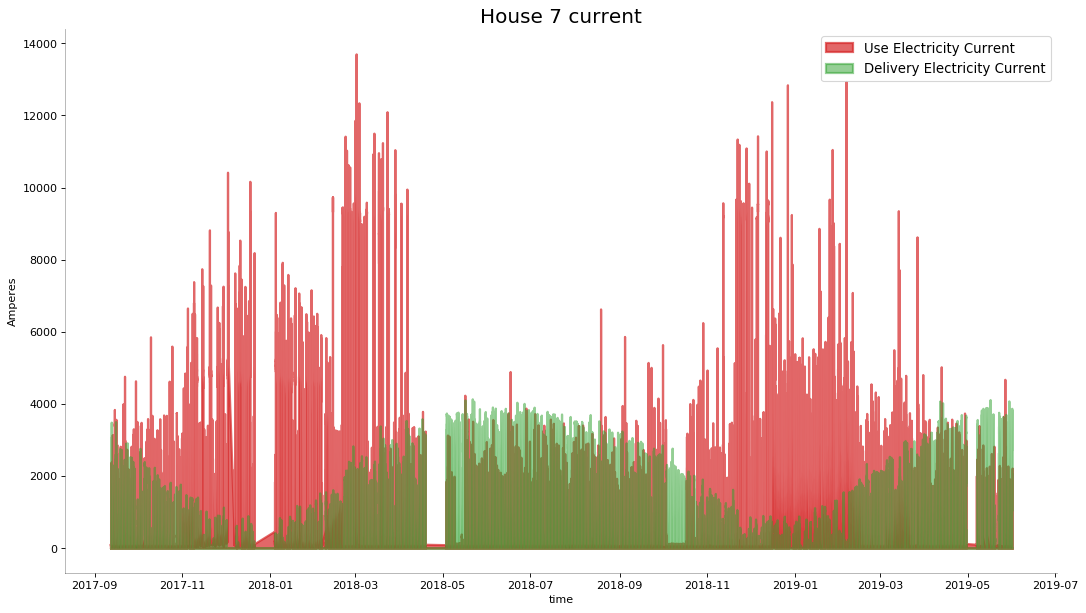

In [13]:

# Prepare Data


production = production.apply(lambda kwh: (kwh / (1/4) * 1000)/230 )
consumption = consumption.apply(lambda kwh: (kwh / (1/4) * 1000)/230 )



x = df.index
y1 = consumption['H07_cons']
y2 = production['H07_prod']
mycolors = ['tab:green', 'tab:red']      
columns = ['Delivery Electricity Current', 'Use Electricity Current']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.7, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)



# Decorations
ax.set_title('House 7 current', fontsize=18)

ax.legend(loc='best', fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


plt.ylabel('Amperes')
plt.xlabel('time')
plt.show()

In [9]:
df_prod.max()

300.4521739130434

In [10]:
consumption['H07_cons']

Index
2017-09-12 00:15:00    0.208696
2017-09-12 00:30:00    0.417391
2017-09-12 00:45:00    0.347826
2017-09-12 01:00:00    0.330435
2017-09-12 01:15:00    0.208696
                         ...   
2019-05-31 23:00:00    0.886957
2019-05-31 23:15:00    0.695652
2019-05-31 23:30:00    0.504348
2019-05-31 23:45:00    0.521739
2019-06-01 00:00:00    0.469565
Name: H07_cons, Length: 54745, dtype: float64

In [11]:

production = production.apply(lambda kwh: (kwh / (1/4) * 1000)/230 )
consumption = consumption.apply(lambda kwh: (kwh / (1/4) * 1000)/230 )


In [12]:
production

,H01_prod,H02_prod,H03_prod,H04_prod,H06_prod,H07_prod,H08_prod,H09_prod,H11_prod,H13_prod,...,H23_prod,H24_prod,H25_prod,H26_prod,H27_prod,H28_prod,H29_prod,H31_prod,H32_prod,H33_prod
Index,,,,,,,,,,,,,,,,,,,,,
2017-09-12 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-12 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-12 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-12 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-12 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
